Importing and formatting data

Import MNIST dataset of 60,000 training images and 10,000 testing images

In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# For drawing the MNIST digits as well as plots to help us evaluate performance we
# will make extensive use of matplotlib
from matplotlib import pyplot as plt

# All of the Keras datasets are in keras.datasets
from tensorflow.keras.datasets import mnist

# Keras has already split the data into training and test data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Training images is a list of 60,000 2D lists.
# Each 2D list is 28 by 28—the size of the MNIST pixel data.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(training_images), training_images[0].shape)

# training_labels are a value between 0 and 9 indicating which digit is represented.
# The first item in the training data is a 5
print(len(training_labels), training_labels[0])


60000 (28, 28)
60000 5


Visualize the first 100 images in the dataset

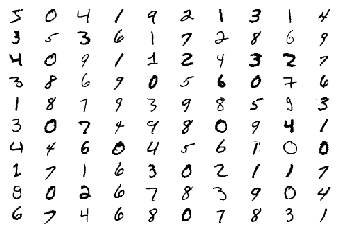

In [2]:
# Lets visualize the first 100 images from the dataset
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(training_images[i], cmap='Greys')

Fixing the data format: using `numpy.reshape` and `keras.util.to_categorical`

In [3]:
from tensorflow.keras.utils import to_categorical

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# [
#     [1,2,3]
#     [4,5,6]
# ]

# => [1,2,3,4,5,6]

# Just showing the changes...
print("training data: ", training_images.shape, " ==> ", training_data.shape)
print("test data: ", test_images.shape, " ==> ", test_data.shape)

training data:  (60000, 28, 28)  ==>  (60000, 784)
test data:  (10000, 28, 28)  ==>  (10000, 784)


In [4]:
# Create 1-hot encoded vectors using to_categorical
num_classes = 10 # Because it's how many digits we have (0-9) 

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [5]:
# Recall that before this transformation, training_labels[0] was the value 5. Look now:
print(training_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
# Using Leakly ReLU is slightly different in Keras, which can be annoying.
# Additionally, Keras allows us to choose any slope we want for the "leaky" part
# rather than being statically 0.01 as in the above two functions. 
from tensorflow.keras.layers import LeakyReLU

# Sequential models are a series of layers applied linearly.
medium_model = Sequential()
# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
medium_model.add(Dense(units=30, input_shape=(image_size,)))
medium_model.add(LeakyReLU(alpha=.1))

medium_model.add(Dense(units=30))
medium_model.add(LeakyReLU(alpha=.09))
medium_model.add(Dropout(rate=0.1))

medium_model.add(Dense(units=30))
medium_model.add(LeakyReLU(alpha=.08))
medium_model.add(Dropout(rate=0.1))

medium_model.add(Dense(units=30))
medium_model.add(LeakyReLU(alpha=.07))
medium_model.add(Dropout(rate=0.1))

medium_model.add(Dense(units=30))
medium_model.add(LeakyReLU(alpha=.06))
medium_model.add(Dropout(rate=0.05))

medium_model.add(Dense(units=30))
medium_model.add(LeakyReLU(alpha=.05))
medium_model.add(Dropout(rate=0.05))

medium_model.add(Dense(units=30))
medium_model.add(LeakyReLU(alpha=.04))
medium_model.add(Dropout(rate=0.05))

medium_model.add(Dense(units=30))
medium_model.add(LeakyReLU(alpha=.03))
medium_model.add(Dropout(rate=0.01))

medium_model.add(Dense(units=30))
medium_model.add(LeakyReLU(alpha=.02))
medium_model.add(Dropout(rate=0.01))

medium_model.add(Dense(units=30))
medium_model.add(LeakyReLU(alpha=.01))
medium_model.add(Dropout(rate=0.01))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
medium_model.add(Dense(units=num_classes, activation='softmax'))
# This function provides useful text data for our network
medium_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 30)                0         
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 30)                0

Compiling and training the model


In [7]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
medium_model.compile(optimizer="nadam", loss='kullback_leibler_divergence', metrics=['accuracy'])

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 5 times (5 epochs)
# And 10% of the data will be used as validation data.
history = medium_model.fit(training_data, training_labels, batch_size=128, epochs=30, verbose=True, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 9s 162us/sample - loss: 1.2763 - accuracy: 0.5518 - val_loss: 0.3799 - val_accuracy: 0.8937
Epoch 2/30
54000/54000 [==============================] - 7s 130us/sample - loss: 0.5088 - accuracy: 0.8523 - val_loss: 0.2377 - val_accuracy: 0.9385
Epoch 3/30
54000/54000 [==============================] - 7s 127us/sample - loss: 0.3693 - accuracy: 0.9009 - val_loss: 0.2150 - val_accuracy: 0.9417
Epoch 4/30
54000/54000 [==============================] - 7s 129us/sample - loss: 0.3042 - accuracy: 0.9198 - val_loss: 0.1942 - val_accuracy: 0.9477
Epoch 5/30
54000/54000 [==============================] - 7s 124us/sample - loss: 0.2704 - accuracy: 0.9308 - val_loss: 0.1780 - val_accuracy: 0.9538
Epoch 6/30
54000/54000 [==============================] - 7s 125us/sample - loss: 0.2432 - accuracy: 0.9371 - val_loss: 0.1693 - val_accuracy: 0.9542
Epoch 7/30
54000/54000 [===========================

Evaluating our model

10000/10000 [==============================] - 2s 217us/sample - loss: 0.1545 - accuracy: 0.9646


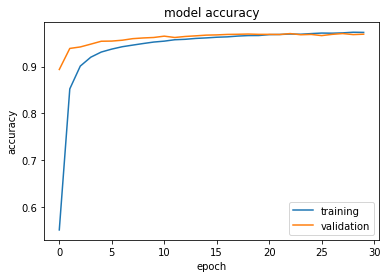

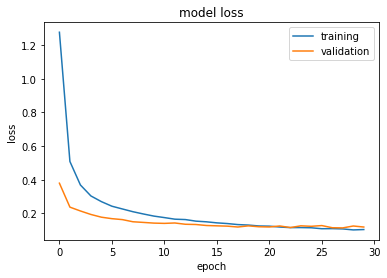

Test loss: 0.155
Test accuracy: 0.965
[0.5517778, 0.85227776, 0.9008704, 0.9198148, 0.9308148, 0.9370926, 0.94214815, 0.9456111, 0.94898146, 0.9521111, 0.954037, 0.9570185, 0.957963, 0.9598333, 0.9609445, 0.9623704, 0.96316665, 0.9648333, 0.9658889, 0.966, 0.9679074, 0.9682222, 0.9691852, 0.9687222, 0.9701296, 0.97124076, 0.97096294, 0.9716667, 0.973, 0.97264814]
[0.8936667, 0.9385, 0.94166666, 0.94766665, 0.95383334, 0.95416665, 0.956, 0.95933336, 0.9608333, 0.96183336, 0.96466666, 0.96183336, 0.964, 0.96533334, 0.96683335, 0.9673333, 0.9683333, 0.9686667, 0.9691667, 0.9685, 0.9685, 0.96816665, 0.9701667, 0.9676667, 0.9683333, 0.9658333, 0.9685, 0.9701667, 0.968, 0.9688333]


In [8]:
loss, accuracy = medium_model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')
print(history.history['accuracy'])
print(history.history['val_accuracy'])

Look at specific results

In [9]:
from numpy import argmax

# Predicting once, then we can use these repeatedly in the next cell without recomputing the predictions.
predictions = medium_model.predict(test_data)

# For pagination & style in second cell
page = 0
fontdict = {'color': 'black'}

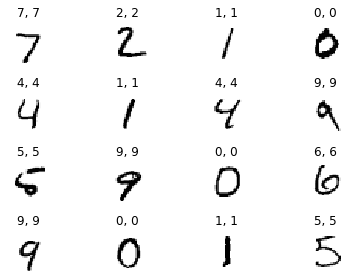

In [10]:
# Repeatedly running this cell will page through the predictions
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.axis('off')
    plt.imshow(test_images[i + page], cmap='Greys')
    prediction = argmax(predictions[i + page])
    true_value = argmax(test_labels[i + page])

    fontdict['color'] = 'black' if prediction == true_value else 'red'
    plt.title("{}, {}".format(prediction, true_value), fontdict=fontdict)

page += 16
plt.tight_layout()
plt.show()